In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
train_X = np.loadtxt("trainX.txt")
train_Y = np.loadtxt("trainY.txt")
test_X = np.loadtxt("testX.txt")
test_Y = np.loadtxt("testY.txt")

In [3]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(500, 256)
(500,)
(100, 256)
(100,)


#### Display single image

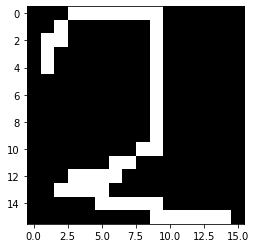

In [4]:
img = train_X[0]
img = np.reshape(img,(16,16),order='F')
plt.imshow(img,cmap='gray');

### Training logistic Regression

In [5]:
total_elements = np.array(np.unique(train_Y, return_counts=True)).T
elements_of_2 = total_elements[0,1]
elements_of_4 = total_elements[1,1]
print("Training Examples of class 2: ",elements_of_2)
print("Training Examples of class 4: ",elements_of_4)

Training Examples of class 2:  250.0
Training Examples of class 4:  250.0


In [6]:
#appending one
train_ones = np.ones(train_X.shape[0])
test_ones = np.ones(test_X.shape[0])
train_X = np.insert(train_X, 0, train_ones, axis=1)
test_X = np.insert(test_X, 0, test_ones, axis=1)

In [7]:
#class labels mapped to 0 1
#class 2 => 1
#class 4 => 0
train_Y = train_Y == 2
train_Y = train_Y.astype(int)
test_Y = test_Y == 2
test_Y = test_Y.astype(int)

In [8]:
def initialize_weights(features):
    return np.random.uniform(low=-1, high=1, size=(features,))

In [9]:
def sigmoid(prediction):
    return (1/(1+np.exp(-prediction)))

In [10]:
def accuracy(pred_label, true_label):
    total_elements = np.array(np.unique(true_label, return_counts=True)).T
    elements_of_2 = total_elements[0,1]
    elements_of_4 = total_elements[1,1]
    
    predicted = pred_label > 0.5
    predicted = predicted.astype(int)
    
    total_correct=0
    class_2_correct=0
    class_4_correct=0
    
    for i in range(len(predicted)):
        if predicted[i] == 1:
            if true_label[i] == 1:
                total_correct+=1
                class_2_correct+=1
        else:
            if true_label[i] == 0:
                total_correct+=1
                class_4_correct+=1
                
    total_accuracy = total_correct/predicted.shape[0]*100
    class_2_accuracy = class_2_correct/elements_of_2*100
    class_4_accuracy = class_4_correct/elements_of_4*100
    
    return total_accuracy, class_2_accuracy, class_4_accuracy

In [11]:
def logistic_regression(X, y, learn_rate, epochs):
    costs=[]
    m ,features = X.shape
    weights = initialize_weights(features)
    
    for i in range(epochs):
        pred = sigmoid(np.dot(X, weights))
        cost = (-1/m) * (np.sum((y.T * np.log(pred)) + ((1-y.T) * np.log(1-pred))))
        costs.append(cost)
        #weights updation
        weights = weights - (learn_rate/m) * np.dot(X.T,(pred - y))
        
        total_accuracy, class_2_accuracy, class_4_accuracy = accuracy(pred,y)
        print('Epoch: {} \tAccuracy: {:.6f} \tCost: {:.6f}'.format(i, total_accuracy, cost))
        
    return weights,costs

# Learning rate 0.01

### Training

In [30]:
weights, cost = logistic_regression(train_X, train_Y, 0.01, 1000)

Epoch: 0 	Accuracy: 34.600000 	Cost: 1.956031
Epoch: 1 	Accuracy: 34.600000 	Cost: 1.942717
Epoch: 2 	Accuracy: 34.800000 	Cost: 1.929557
Epoch: 3 	Accuracy: 35.000000 	Cost: 1.916547
Epoch: 4 	Accuracy: 35.000000 	Cost: 1.903686
Epoch: 5 	Accuracy: 35.600000 	Cost: 1.890972
Epoch: 6 	Accuracy: 35.800000 	Cost: 1.878403
Epoch: 7 	Accuracy: 36.200000 	Cost: 1.865978
Epoch: 8 	Accuracy: 36.000000 	Cost: 1.853694
Epoch: 9 	Accuracy: 36.600000 	Cost: 1.841550
Epoch: 10 	Accuracy: 37.000000 	Cost: 1.829544
Epoch: 11 	Accuracy: 37.200000 	Cost: 1.817674
Epoch: 12 	Accuracy: 37.200000 	Cost: 1.805938
Epoch: 13 	Accuracy: 37.600000 	Cost: 1.794334
Epoch: 14 	Accuracy: 37.600000 	Cost: 1.782860
Epoch: 15 	Accuracy: 38.000000 	Cost: 1.771515
Epoch: 16 	Accuracy: 38.000000 	Cost: 1.760297
Epoch: 17 	Accuracy: 38.000000 	Cost: 1.749203
Epoch: 18 	Accuracy: 38.200000 	Cost: 1.738233
Epoch: 19 	Accuracy: 38.800000 	Cost: 1.727383
Epoch: 20 	Accuracy: 39.000000 	Cost: 1.716654
Epoch: 21 	Accuracy: 39

Epoch: 213 	Accuracy: 69.200000 	Cost: 0.720179
Epoch: 214 	Accuracy: 69.200000 	Cost: 0.717708
Epoch: 215 	Accuracy: 69.800000 	Cost: 0.715251
Epoch: 216 	Accuracy: 70.200000 	Cost: 0.712808
Epoch: 217 	Accuracy: 70.400000 	Cost: 0.710379
Epoch: 218 	Accuracy: 70.400000 	Cost: 0.707964
Epoch: 219 	Accuracy: 70.400000 	Cost: 0.705562
Epoch: 220 	Accuracy: 70.400000 	Cost: 0.703173
Epoch: 221 	Accuracy: 70.400000 	Cost: 0.700798
Epoch: 222 	Accuracy: 70.400000 	Cost: 0.698437
Epoch: 223 	Accuracy: 70.400000 	Cost: 0.696088
Epoch: 224 	Accuracy: 70.400000 	Cost: 0.693753
Epoch: 225 	Accuracy: 70.600000 	Cost: 0.691431
Epoch: 226 	Accuracy: 70.600000 	Cost: 0.689121
Epoch: 227 	Accuracy: 70.800000 	Cost: 0.686824
Epoch: 228 	Accuracy: 70.800000 	Cost: 0.684541
Epoch: 229 	Accuracy: 70.800000 	Cost: 0.682269
Epoch: 230 	Accuracy: 71.200000 	Cost: 0.680011
Epoch: 231 	Accuracy: 71.400000 	Cost: 0.677764
Epoch: 232 	Accuracy: 71.600000 	Cost: 0.675531
Epoch: 233 	Accuracy: 71.600000 	Cost: 0

Epoch: 432 	Accuracy: 83.800000 	Cost: 0.393624
Epoch: 433 	Accuracy: 83.800000 	Cost: 0.392754
Epoch: 434 	Accuracy: 83.800000 	Cost: 0.391887
Epoch: 435 	Accuracy: 84.000000 	Cost: 0.391023
Epoch: 436 	Accuracy: 84.000000 	Cost: 0.390163
Epoch: 437 	Accuracy: 84.000000 	Cost: 0.389306
Epoch: 438 	Accuracy: 84.000000 	Cost: 0.388452
Epoch: 439 	Accuracy: 84.000000 	Cost: 0.387602
Epoch: 440 	Accuracy: 84.000000 	Cost: 0.386755
Epoch: 441 	Accuracy: 84.200000 	Cost: 0.385912
Epoch: 442 	Accuracy: 84.600000 	Cost: 0.385072
Epoch: 443 	Accuracy: 84.600000 	Cost: 0.384235
Epoch: 444 	Accuracy: 84.600000 	Cost: 0.383401
Epoch: 445 	Accuracy: 84.600000 	Cost: 0.382571
Epoch: 446 	Accuracy: 84.600000 	Cost: 0.381744
Epoch: 447 	Accuracy: 84.600000 	Cost: 0.380920
Epoch: 448 	Accuracy: 84.600000 	Cost: 0.380099
Epoch: 449 	Accuracy: 84.800000 	Cost: 0.379281
Epoch: 450 	Accuracy: 85.000000 	Cost: 0.378467
Epoch: 451 	Accuracy: 85.000000 	Cost: 0.377655
Epoch: 452 	Accuracy: 85.000000 	Cost: 0

Epoch: 651 	Accuracy: 89.800000 	Cost: 0.261579
Epoch: 652 	Accuracy: 89.800000 	Cost: 0.261167
Epoch: 653 	Accuracy: 89.800000 	Cost: 0.260756
Epoch: 654 	Accuracy: 90.000000 	Cost: 0.260347
Epoch: 655 	Accuracy: 90.000000 	Cost: 0.259938
Epoch: 656 	Accuracy: 90.000000 	Cost: 0.259531
Epoch: 657 	Accuracy: 90.000000 	Cost: 0.259125
Epoch: 658 	Accuracy: 90.000000 	Cost: 0.258720
Epoch: 659 	Accuracy: 90.200000 	Cost: 0.258317
Epoch: 660 	Accuracy: 90.200000 	Cost: 0.257914
Epoch: 661 	Accuracy: 90.200000 	Cost: 0.257513
Epoch: 662 	Accuracy: 90.200000 	Cost: 0.257113
Epoch: 663 	Accuracy: 90.200000 	Cost: 0.256714
Epoch: 664 	Accuracy: 90.200000 	Cost: 0.256317
Epoch: 665 	Accuracy: 90.200000 	Cost: 0.255920
Epoch: 666 	Accuracy: 90.200000 	Cost: 0.255525
Epoch: 667 	Accuracy: 90.200000 	Cost: 0.255130
Epoch: 668 	Accuracy: 90.200000 	Cost: 0.254737
Epoch: 669 	Accuracy: 90.200000 	Cost: 0.254345
Epoch: 670 	Accuracy: 90.200000 	Cost: 0.253955
Epoch: 671 	Accuracy: 90.200000 	Cost: 0

Epoch: 876 	Accuracy: 93.200000 	Cost: 0.192407
Epoch: 877 	Accuracy: 93.200000 	Cost: 0.192180
Epoch: 878 	Accuracy: 93.200000 	Cost: 0.191953
Epoch: 879 	Accuracy: 93.200000 	Cost: 0.191727
Epoch: 880 	Accuracy: 93.200000 	Cost: 0.191502
Epoch: 881 	Accuracy: 93.200000 	Cost: 0.191277
Epoch: 882 	Accuracy: 93.200000 	Cost: 0.191053
Epoch: 883 	Accuracy: 93.200000 	Cost: 0.190829
Epoch: 884 	Accuracy: 93.200000 	Cost: 0.190606
Epoch: 885 	Accuracy: 93.200000 	Cost: 0.190384
Epoch: 886 	Accuracy: 93.200000 	Cost: 0.190161
Epoch: 887 	Accuracy: 93.200000 	Cost: 0.189940
Epoch: 888 	Accuracy: 93.200000 	Cost: 0.189719
Epoch: 889 	Accuracy: 93.200000 	Cost: 0.189498
Epoch: 890 	Accuracy: 93.200000 	Cost: 0.189278
Epoch: 891 	Accuracy: 93.200000 	Cost: 0.189059
Epoch: 892 	Accuracy: 93.200000 	Cost: 0.188840
Epoch: 893 	Accuracy: 93.200000 	Cost: 0.188621
Epoch: 894 	Accuracy: 93.200000 	Cost: 0.188403
Epoch: 895 	Accuracy: 93.200000 	Cost: 0.188186
Epoch: 896 	Accuracy: 93.200000 	Cost: 0

Training Accuracy:  94.39999999999999
Class 2 Training Accuracy:  94.0
Class 4 Training Accuracy:  94.8


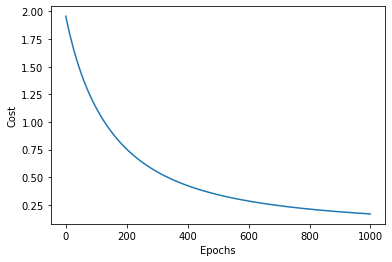

In [31]:
train_pred = sigmoid(np.dot(train_X, weights))
total_accuracy, class_2_accuracy, class_4_accuracy = accuracy(train_pred,train_Y)

print("Training Accuracy: ", total_accuracy)
print("Class 2 Training Accuracy: ", class_2_accuracy)
print("Class 4 Training Accuracy: ", class_4_accuracy) 
plt.plot(range(1000),cost);
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

### Testing

In [32]:
test_pred = sigmoid(np.dot(test_X, weights))
total_accuracy, class_2_accuracy, class_4_accuracy = accuracy(test_pred,test_Y)
print("Testing Accuracy: ", total_accuracy)
print("Class 2 Testing Accuracy: ", class_2_accuracy)
print("Class 4 Testing Accuracy: ", class_4_accuracy) 

Testing Accuracy:  97.0
Class 2 Testing Accuracy:  94.0
Class 4 Testing Accuracy:  100.0


# Learning rate 0.1

### Training

In [33]:
weights, cost = logistic_regression(train_X, train_Y, 0.1, 1000)

Epoch: 0 	Accuracy: 45.600000 	Cost: 2.227774
Epoch: 1 	Accuracy: 45.000000 	Cost: 2.092269
Epoch: 2 	Accuracy: 45.600000 	Cost: 1.964729
Epoch: 3 	Accuracy: 45.600000 	Cost: 1.845072
Epoch: 4 	Accuracy: 46.800000 	Cost: 1.733156
Epoch: 5 	Accuracy: 46.000000 	Cost: 1.628776
Epoch: 6 	Accuracy: 47.200000 	Cost: 1.531673
Epoch: 7 	Accuracy: 49.000000 	Cost: 1.441540
Epoch: 8 	Accuracy: 49.200000 	Cost: 1.358027
Epoch: 9 	Accuracy: 50.200000 	Cost: 1.280756
Epoch: 10 	Accuracy: 51.600000 	Cost: 1.209322
Epoch: 11 	Accuracy: 53.000000 	Cost: 1.143309
Epoch: 12 	Accuracy: 55.200000 	Cost: 1.082304
Epoch: 13 	Accuracy: 57.000000 	Cost: 1.025899
Epoch: 14 	Accuracy: 58.600000 	Cost: 0.973707
Epoch: 15 	Accuracy: 61.200000 	Cost: 0.925365
Epoch: 16 	Accuracy: 62.200000 	Cost: 0.880537
Epoch: 17 	Accuracy: 62.800000 	Cost: 0.838915
Epoch: 18 	Accuracy: 65.000000 	Cost: 0.800219
Epoch: 19 	Accuracy: 65.600000 	Cost: 0.764196
Epoch: 20 	Accuracy: 67.000000 	Cost: 0.730617
Epoch: 21 	Accuracy: 68

Epoch: 204 	Accuracy: 98.600000 	Cost: 0.064467
Epoch: 205 	Accuracy: 98.600000 	Cost: 0.064170
Epoch: 206 	Accuracy: 98.600000 	Cost: 0.063876
Epoch: 207 	Accuracy: 98.600000 	Cost: 0.063584
Epoch: 208 	Accuracy: 98.600000 	Cost: 0.063296
Epoch: 209 	Accuracy: 98.600000 	Cost: 0.063011
Epoch: 210 	Accuracy: 98.600000 	Cost: 0.062728
Epoch: 211 	Accuracy: 98.600000 	Cost: 0.062448
Epoch: 212 	Accuracy: 98.600000 	Cost: 0.062171
Epoch: 213 	Accuracy: 98.600000 	Cost: 0.061896
Epoch: 214 	Accuracy: 98.600000 	Cost: 0.061624
Epoch: 215 	Accuracy: 98.600000 	Cost: 0.061355
Epoch: 216 	Accuracy: 98.600000 	Cost: 0.061088
Epoch: 217 	Accuracy: 98.600000 	Cost: 0.060824
Epoch: 218 	Accuracy: 98.600000 	Cost: 0.060562
Epoch: 219 	Accuracy: 98.600000 	Cost: 0.060302
Epoch: 220 	Accuracy: 98.600000 	Cost: 0.060045
Epoch: 221 	Accuracy: 98.600000 	Cost: 0.059791
Epoch: 222 	Accuracy: 98.600000 	Cost: 0.059538
Epoch: 223 	Accuracy: 98.600000 	Cost: 0.059288
Epoch: 224 	Accuracy: 98.600000 	Cost: 0

Epoch: 422 	Accuracy: 98.800000 	Cost: 0.032726
Epoch: 423 	Accuracy: 98.800000 	Cost: 0.032653
Epoch: 424 	Accuracy: 98.800000 	Cost: 0.032580
Epoch: 425 	Accuracy: 98.800000 	Cost: 0.032507
Epoch: 426 	Accuracy: 98.800000 	Cost: 0.032435
Epoch: 427 	Accuracy: 98.800000 	Cost: 0.032363
Epoch: 428 	Accuracy: 98.800000 	Cost: 0.032291
Epoch: 429 	Accuracy: 98.800000 	Cost: 0.032220
Epoch: 430 	Accuracy: 98.800000 	Cost: 0.032148
Epoch: 431 	Accuracy: 98.800000 	Cost: 0.032078
Epoch: 432 	Accuracy: 98.800000 	Cost: 0.032007
Epoch: 433 	Accuracy: 98.800000 	Cost: 0.031937
Epoch: 434 	Accuracy: 98.800000 	Cost: 0.031867
Epoch: 435 	Accuracy: 98.800000 	Cost: 0.031797
Epoch: 436 	Accuracy: 98.800000 	Cost: 0.031728
Epoch: 437 	Accuracy: 98.800000 	Cost: 0.031659
Epoch: 438 	Accuracy: 98.800000 	Cost: 0.031590
Epoch: 439 	Accuracy: 98.800000 	Cost: 0.031522
Epoch: 440 	Accuracy: 98.800000 	Cost: 0.031454
Epoch: 441 	Accuracy: 98.800000 	Cost: 0.031386
Epoch: 442 	Accuracy: 98.800000 	Cost: 0

Epoch: 632 	Accuracy: 99.200000 	Cost: 0.022144
Epoch: 633 	Accuracy: 99.200000 	Cost: 0.022109
Epoch: 634 	Accuracy: 99.200000 	Cost: 0.022075
Epoch: 635 	Accuracy: 99.200000 	Cost: 0.022041
Epoch: 636 	Accuracy: 99.200000 	Cost: 0.022006
Epoch: 637 	Accuracy: 99.200000 	Cost: 0.021972
Epoch: 638 	Accuracy: 99.200000 	Cost: 0.021938
Epoch: 639 	Accuracy: 99.200000 	Cost: 0.021904
Epoch: 640 	Accuracy: 99.200000 	Cost: 0.021871
Epoch: 641 	Accuracy: 99.200000 	Cost: 0.021837
Epoch: 642 	Accuracy: 99.200000 	Cost: 0.021803
Epoch: 643 	Accuracy: 99.200000 	Cost: 0.021770
Epoch: 644 	Accuracy: 99.200000 	Cost: 0.021736
Epoch: 645 	Accuracy: 99.200000 	Cost: 0.021703
Epoch: 646 	Accuracy: 99.200000 	Cost: 0.021670
Epoch: 647 	Accuracy: 99.200000 	Cost: 0.021637
Epoch: 648 	Accuracy: 99.200000 	Cost: 0.021604
Epoch: 649 	Accuracy: 99.400000 	Cost: 0.021571
Epoch: 650 	Accuracy: 99.400000 	Cost: 0.021538
Epoch: 651 	Accuracy: 99.400000 	Cost: 0.021505
Epoch: 652 	Accuracy: 99.400000 	Cost: 0

Epoch: 862 	Accuracy: 99.600000 	Cost: 0.016240
Epoch: 863 	Accuracy: 99.600000 	Cost: 0.016221
Epoch: 864 	Accuracy: 99.600000 	Cost: 0.016202
Epoch: 865 	Accuracy: 99.600000 	Cost: 0.016183
Epoch: 866 	Accuracy: 99.600000 	Cost: 0.016164
Epoch: 867 	Accuracy: 99.600000 	Cost: 0.016145
Epoch: 868 	Accuracy: 99.800000 	Cost: 0.016126
Epoch: 869 	Accuracy: 99.800000 	Cost: 0.016108
Epoch: 870 	Accuracy: 99.800000 	Cost: 0.016089
Epoch: 871 	Accuracy: 99.800000 	Cost: 0.016070
Epoch: 872 	Accuracy: 99.800000 	Cost: 0.016052
Epoch: 873 	Accuracy: 99.800000 	Cost: 0.016033
Epoch: 874 	Accuracy: 99.800000 	Cost: 0.016014
Epoch: 875 	Accuracy: 99.800000 	Cost: 0.015996
Epoch: 876 	Accuracy: 99.800000 	Cost: 0.015977
Epoch: 877 	Accuracy: 99.800000 	Cost: 0.015959
Epoch: 878 	Accuracy: 99.800000 	Cost: 0.015941
Epoch: 879 	Accuracy: 99.800000 	Cost: 0.015922
Epoch: 880 	Accuracy: 99.800000 	Cost: 0.015904
Epoch: 881 	Accuracy: 99.800000 	Cost: 0.015886
Epoch: 882 	Accuracy: 99.800000 	Cost: 0

Training Accuracy:  99.8
Class 2 Training Accuracy:  100.0
Class 4 Training Accuracy:  99.6


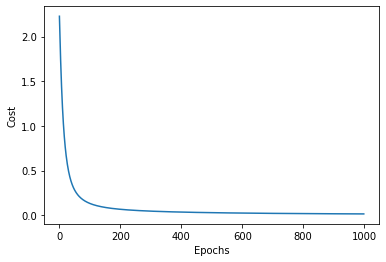

In [34]:
train_pred = sigmoid(np.dot(train_X, weights))
total_accuracy, class_2_accuracy, class_4_accuracy = accuracy(train_pred,train_Y)

print("Training Accuracy: ", total_accuracy)
print("Class 2 Training Accuracy: ", class_2_accuracy)
print("Class 4 Training Accuracy: ", class_4_accuracy) 
plt.plot(range(1000),cost);
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

### Testing

In [35]:
test_pred = sigmoid(np.dot(test_X, weights))
total_accuracy, class_2_accuracy, class_4_accuracy = accuracy(test_pred,test_Y)
print("Testing Accuracy: ", total_accuracy)
print("Class 2 Testing Accuracy: ", class_2_accuracy)
print("Class 4 Testing Accuracy: ", class_4_accuracy) 

Testing Accuracy:  100.0
Class 2 Testing Accuracy:  100.0
Class 4 Testing Accuracy:  100.0


# Learning rate 0.3

### Training

In [36]:
weights, cost = logistic_regression(train_X, train_Y, 0.3, 1000)

Epoch: 0 	Accuracy: 55.600000 	Cost: 1.508658
Epoch: 1 	Accuracy: 58.000000 	Cost: 1.317392
Epoch: 2 	Accuracy: 61.200000 	Cost: 1.151118
Epoch: 3 	Accuracy: 63.600000 	Cost: 1.007411
Epoch: 4 	Accuracy: 66.200000 	Cost: 0.883960
Epoch: 5 	Accuracy: 69.000000 	Cost: 0.778444
Epoch: 6 	Accuracy: 71.800000 	Cost: 0.688534
Epoch: 7 	Accuracy: 75.000000 	Cost: 0.611997
Epoch: 8 	Accuracy: 77.200000 	Cost: 0.546796
Epoch: 9 	Accuracy: 79.200000 	Cost: 0.491138
Epoch: 10 	Accuracy: 81.000000 	Cost: 0.443486
Epoch: 11 	Accuracy: 83.000000 	Cost: 0.402540
Epoch: 12 	Accuracy: 85.000000 	Cost: 0.367210
Epoch: 13 	Accuracy: 85.400000 	Cost: 0.336589
Epoch: 14 	Accuracy: 86.600000 	Cost: 0.309927
Epoch: 15 	Accuracy: 88.000000 	Cost: 0.286603
Epoch: 16 	Accuracy: 88.600000 	Cost: 0.266103
Epoch: 17 	Accuracy: 90.200000 	Cost: 0.248003
Epoch: 18 	Accuracy: 90.800000 	Cost: 0.231952
Epoch: 19 	Accuracy: 91.200000 	Cost: 0.217655
Epoch: 20 	Accuracy: 91.400000 	Cost: 0.204870
Epoch: 21 	Accuracy: 91

Epoch: 202 	Accuracy: 99.400000 	Cost: 0.021100
Epoch: 203 	Accuracy: 99.400000 	Cost: 0.021004
Epoch: 204 	Accuracy: 99.400000 	Cost: 0.020908
Epoch: 205 	Accuracy: 99.400000 	Cost: 0.020813
Epoch: 206 	Accuracy: 99.400000 	Cost: 0.020719
Epoch: 207 	Accuracy: 99.400000 	Cost: 0.020625
Epoch: 208 	Accuracy: 99.400000 	Cost: 0.020533
Epoch: 209 	Accuracy: 99.400000 	Cost: 0.020441
Epoch: 210 	Accuracy: 99.400000 	Cost: 0.020350
Epoch: 211 	Accuracy: 99.400000 	Cost: 0.020259
Epoch: 212 	Accuracy: 99.400000 	Cost: 0.020170
Epoch: 213 	Accuracy: 99.400000 	Cost: 0.020081
Epoch: 214 	Accuracy: 99.400000 	Cost: 0.019992
Epoch: 215 	Accuracy: 99.400000 	Cost: 0.019905
Epoch: 216 	Accuracy: 99.400000 	Cost: 0.019818
Epoch: 217 	Accuracy: 99.400000 	Cost: 0.019732
Epoch: 218 	Accuracy: 99.400000 	Cost: 0.019647
Epoch: 219 	Accuracy: 99.400000 	Cost: 0.019562
Epoch: 220 	Accuracy: 99.400000 	Cost: 0.019478
Epoch: 221 	Accuracy: 99.400000 	Cost: 0.019394
Epoch: 222 	Accuracy: 99.400000 	Cost: 0

Epoch: 412 	Accuracy: 100.000000 	Cost: 0.010439
Epoch: 413 	Accuracy: 100.000000 	Cost: 0.010413
Epoch: 414 	Accuracy: 100.000000 	Cost: 0.010387
Epoch: 415 	Accuracy: 100.000000 	Cost: 0.010362
Epoch: 416 	Accuracy: 100.000000 	Cost: 0.010336
Epoch: 417 	Accuracy: 100.000000 	Cost: 0.010311
Epoch: 418 	Accuracy: 100.000000 	Cost: 0.010286
Epoch: 419 	Accuracy: 100.000000 	Cost: 0.010261
Epoch: 420 	Accuracy: 100.000000 	Cost: 0.010236
Epoch: 421 	Accuracy: 100.000000 	Cost: 0.010211
Epoch: 422 	Accuracy: 100.000000 	Cost: 0.010186
Epoch: 423 	Accuracy: 100.000000 	Cost: 0.010161
Epoch: 424 	Accuracy: 100.000000 	Cost: 0.010137
Epoch: 425 	Accuracy: 100.000000 	Cost: 0.010112
Epoch: 426 	Accuracy: 100.000000 	Cost: 0.010088
Epoch: 427 	Accuracy: 100.000000 	Cost: 0.010064
Epoch: 428 	Accuracy: 100.000000 	Cost: 0.010040
Epoch: 429 	Accuracy: 100.000000 	Cost: 0.010016
Epoch: 430 	Accuracy: 100.000000 	Cost: 0.009992
Epoch: 431 	Accuracy: 100.000000 	Cost: 0.009968
Epoch: 432 	Accuracy

Epoch: 635 	Accuracy: 100.000000 	Cost: 0.006710
Epoch: 636 	Accuracy: 100.000000 	Cost: 0.006699
Epoch: 637 	Accuracy: 100.000000 	Cost: 0.006689
Epoch: 638 	Accuracy: 100.000000 	Cost: 0.006678
Epoch: 639 	Accuracy: 100.000000 	Cost: 0.006667
Epoch: 640 	Accuracy: 100.000000 	Cost: 0.006657
Epoch: 641 	Accuracy: 100.000000 	Cost: 0.006646
Epoch: 642 	Accuracy: 100.000000 	Cost: 0.006636
Epoch: 643 	Accuracy: 100.000000 	Cost: 0.006625
Epoch: 644 	Accuracy: 100.000000 	Cost: 0.006615
Epoch: 645 	Accuracy: 100.000000 	Cost: 0.006604
Epoch: 646 	Accuracy: 100.000000 	Cost: 0.006594
Epoch: 647 	Accuracy: 100.000000 	Cost: 0.006584
Epoch: 648 	Accuracy: 100.000000 	Cost: 0.006573
Epoch: 649 	Accuracy: 100.000000 	Cost: 0.006563
Epoch: 650 	Accuracy: 100.000000 	Cost: 0.006553
Epoch: 651 	Accuracy: 100.000000 	Cost: 0.006543
Epoch: 652 	Accuracy: 100.000000 	Cost: 0.006533
Epoch: 653 	Accuracy: 100.000000 	Cost: 0.006522
Epoch: 654 	Accuracy: 100.000000 	Cost: 0.006512
Epoch: 655 	Accuracy

Epoch: 851 	Accuracy: 100.000000 	Cost: 0.004997
Epoch: 852 	Accuracy: 100.000000 	Cost: 0.004991
Epoch: 853 	Accuracy: 100.000000 	Cost: 0.004986
Epoch: 854 	Accuracy: 100.000000 	Cost: 0.004980
Epoch: 855 	Accuracy: 100.000000 	Cost: 0.004974
Epoch: 856 	Accuracy: 100.000000 	Cost: 0.004968
Epoch: 857 	Accuracy: 100.000000 	Cost: 0.004962
Epoch: 858 	Accuracy: 100.000000 	Cost: 0.004957
Epoch: 859 	Accuracy: 100.000000 	Cost: 0.004951
Epoch: 860 	Accuracy: 100.000000 	Cost: 0.004945
Epoch: 861 	Accuracy: 100.000000 	Cost: 0.004939
Epoch: 862 	Accuracy: 100.000000 	Cost: 0.004934
Epoch: 863 	Accuracy: 100.000000 	Cost: 0.004928
Epoch: 864 	Accuracy: 100.000000 	Cost: 0.004922
Epoch: 865 	Accuracy: 100.000000 	Cost: 0.004917
Epoch: 866 	Accuracy: 100.000000 	Cost: 0.004911
Epoch: 867 	Accuracy: 100.000000 	Cost: 0.004905
Epoch: 868 	Accuracy: 100.000000 	Cost: 0.004900
Epoch: 869 	Accuracy: 100.000000 	Cost: 0.004894
Epoch: 870 	Accuracy: 100.000000 	Cost: 0.004888
Epoch: 871 	Accuracy

Training Accuracy:  100.0
Class 2 Training Accuracy:  100.0
Class 4 Training Accuracy:  100.0


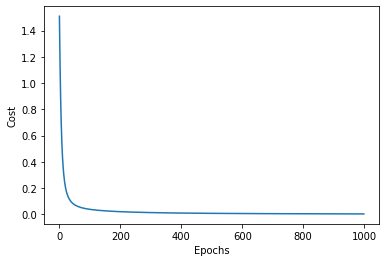

In [37]:
train_pred = sigmoid(np.dot(train_X, weights))
total_accuracy, class_2_accuracy, class_4_accuracy = accuracy(train_pred,train_Y)

print("Training Accuracy: ", total_accuracy)
print("Class 2 Training Accuracy: ", class_2_accuracy)
print("Class 4 Training Accuracy: ", class_4_accuracy) 
plt.plot(range(1000),cost);
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

### Testing

In [38]:
test_pred = sigmoid(np.dot(test_X, weights))
total_accuracy, class_2_accuracy, class_4_accuracy = accuracy(test_pred,test_Y)
print("Testing Accuracy: ", total_accuracy)
print("Class 2 Testing Accuracy: ", class_2_accuracy)
print("Class 4 Testing Accuracy: ", class_4_accuracy) 

Testing Accuracy:  100.0
Class 2 Testing Accuracy:  100.0
Class 4 Testing Accuracy:  100.0


# Learning rate 0.5

### Training

In [39]:
weights, cost = logistic_regression(train_X, train_Y, 0.5, 1000)

Epoch: 0 	Accuracy: 49.400000 	Cost: 2.827487
Epoch: 1 	Accuracy: 56.000000 	Cost: 1.529335
Epoch: 2 	Accuracy: 66.600000 	Cost: 0.948813
Epoch: 3 	Accuracy: 71.800000 	Cost: 0.732687
Epoch: 4 	Accuracy: 75.200000 	Cost: 0.615898
Epoch: 5 	Accuracy: 78.400000 	Cost: 0.534345
Epoch: 6 	Accuracy: 79.600000 	Cost: 0.470544
Epoch: 7 	Accuracy: 81.600000 	Cost: 0.418367
Epoch: 8 	Accuracy: 83.400000 	Cost: 0.374873
Epoch: 9 	Accuracy: 85.000000 	Cost: 0.338233
Epoch: 10 	Accuracy: 86.000000 	Cost: 0.307135
Epoch: 11 	Accuracy: 87.200000 	Cost: 0.280567
Epoch: 12 	Accuracy: 88.400000 	Cost: 0.257729
Epoch: 13 	Accuracy: 89.800000 	Cost: 0.237979
Epoch: 14 	Accuracy: 91.000000 	Cost: 0.220796
Epoch: 15 	Accuracy: 91.400000 	Cost: 0.205758
Epoch: 16 	Accuracy: 92.400000 	Cost: 0.192520
Epoch: 17 	Accuracy: 93.000000 	Cost: 0.180803
Epoch: 18 	Accuracy: 93.200000 	Cost: 0.170377
Epoch: 19 	Accuracy: 93.600000 	Cost: 0.161053
Epoch: 20 	Accuracy: 94.200000 	Cost: 0.152675
Epoch: 21 	Accuracy: 94

Epoch: 196 	Accuracy: 99.600000 	Cost: 0.015888
Epoch: 197 	Accuracy: 99.600000 	Cost: 0.015795
Epoch: 198 	Accuracy: 99.600000 	Cost: 0.015703
Epoch: 199 	Accuracy: 99.600000 	Cost: 0.015612
Epoch: 200 	Accuracy: 99.600000 	Cost: 0.015522
Epoch: 201 	Accuracy: 99.600000 	Cost: 0.015433
Epoch: 202 	Accuracy: 99.600000 	Cost: 0.015345
Epoch: 203 	Accuracy: 99.600000 	Cost: 0.015258
Epoch: 204 	Accuracy: 99.600000 	Cost: 0.015171
Epoch: 205 	Accuracy: 99.800000 	Cost: 0.015086
Epoch: 206 	Accuracy: 99.800000 	Cost: 0.015001
Epoch: 207 	Accuracy: 99.800000 	Cost: 0.014917
Epoch: 208 	Accuracy: 99.800000 	Cost: 0.014834
Epoch: 209 	Accuracy: 99.800000 	Cost: 0.014752
Epoch: 210 	Accuracy: 99.800000 	Cost: 0.014670
Epoch: 211 	Accuracy: 99.800000 	Cost: 0.014590
Epoch: 212 	Accuracy: 99.800000 	Cost: 0.014510
Epoch: 213 	Accuracy: 99.800000 	Cost: 0.014431
Epoch: 214 	Accuracy: 99.800000 	Cost: 0.014352
Epoch: 215 	Accuracy: 99.800000 	Cost: 0.014275
Epoch: 216 	Accuracy: 99.800000 	Cost: 0

Epoch: 407 	Accuracy: 100.000000 	Cost: 0.006862
Epoch: 408 	Accuracy: 100.000000 	Cost: 0.006844
Epoch: 409 	Accuracy: 100.000000 	Cost: 0.006825
Epoch: 410 	Accuracy: 100.000000 	Cost: 0.006807
Epoch: 411 	Accuracy: 100.000000 	Cost: 0.006789
Epoch: 412 	Accuracy: 100.000000 	Cost: 0.006771
Epoch: 413 	Accuracy: 100.000000 	Cost: 0.006753
Epoch: 414 	Accuracy: 100.000000 	Cost: 0.006735
Epoch: 415 	Accuracy: 100.000000 	Cost: 0.006717
Epoch: 416 	Accuracy: 100.000000 	Cost: 0.006699
Epoch: 417 	Accuracy: 100.000000 	Cost: 0.006682
Epoch: 418 	Accuracy: 100.000000 	Cost: 0.006664
Epoch: 419 	Accuracy: 100.000000 	Cost: 0.006647
Epoch: 420 	Accuracy: 100.000000 	Cost: 0.006629
Epoch: 421 	Accuracy: 100.000000 	Cost: 0.006612
Epoch: 422 	Accuracy: 100.000000 	Cost: 0.006595
Epoch: 423 	Accuracy: 100.000000 	Cost: 0.006578
Epoch: 424 	Accuracy: 100.000000 	Cost: 0.006561
Epoch: 425 	Accuracy: 100.000000 	Cost: 0.006544
Epoch: 426 	Accuracy: 100.000000 	Cost: 0.006527
Epoch: 427 	Accuracy

Epoch: 604 	Accuracy: 100.000000 	Cost: 0.004500
Epoch: 605 	Accuracy: 100.000000 	Cost: 0.004492
Epoch: 606 	Accuracy: 100.000000 	Cost: 0.004485
Epoch: 607 	Accuracy: 100.000000 	Cost: 0.004477
Epoch: 608 	Accuracy: 100.000000 	Cost: 0.004469
Epoch: 609 	Accuracy: 100.000000 	Cost: 0.004462
Epoch: 610 	Accuracy: 100.000000 	Cost: 0.004454
Epoch: 611 	Accuracy: 100.000000 	Cost: 0.004447
Epoch: 612 	Accuracy: 100.000000 	Cost: 0.004439
Epoch: 613 	Accuracy: 100.000000 	Cost: 0.004432
Epoch: 614 	Accuracy: 100.000000 	Cost: 0.004424
Epoch: 615 	Accuracy: 100.000000 	Cost: 0.004417
Epoch: 616 	Accuracy: 100.000000 	Cost: 0.004409
Epoch: 617 	Accuracy: 100.000000 	Cost: 0.004402
Epoch: 618 	Accuracy: 100.000000 	Cost: 0.004394
Epoch: 619 	Accuracy: 100.000000 	Cost: 0.004387
Epoch: 620 	Accuracy: 100.000000 	Cost: 0.004380
Epoch: 621 	Accuracy: 100.000000 	Cost: 0.004372
Epoch: 622 	Accuracy: 100.000000 	Cost: 0.004365
Epoch: 623 	Accuracy: 100.000000 	Cost: 0.004358
Epoch: 624 	Accuracy

Epoch: 793 	Accuracy: 100.000000 	Cost: 0.003405
Epoch: 794 	Accuracy: 100.000000 	Cost: 0.003401
Epoch: 795 	Accuracy: 100.000000 	Cost: 0.003396
Epoch: 796 	Accuracy: 100.000000 	Cost: 0.003392
Epoch: 797 	Accuracy: 100.000000 	Cost: 0.003388
Epoch: 798 	Accuracy: 100.000000 	Cost: 0.003384
Epoch: 799 	Accuracy: 100.000000 	Cost: 0.003379
Epoch: 800 	Accuracy: 100.000000 	Cost: 0.003375
Epoch: 801 	Accuracy: 100.000000 	Cost: 0.003371
Epoch: 802 	Accuracy: 100.000000 	Cost: 0.003366
Epoch: 803 	Accuracy: 100.000000 	Cost: 0.003362
Epoch: 804 	Accuracy: 100.000000 	Cost: 0.003358
Epoch: 805 	Accuracy: 100.000000 	Cost: 0.003354
Epoch: 806 	Accuracy: 100.000000 	Cost: 0.003350
Epoch: 807 	Accuracy: 100.000000 	Cost: 0.003345
Epoch: 808 	Accuracy: 100.000000 	Cost: 0.003341
Epoch: 809 	Accuracy: 100.000000 	Cost: 0.003337
Epoch: 810 	Accuracy: 100.000000 	Cost: 0.003333
Epoch: 811 	Accuracy: 100.000000 	Cost: 0.003329
Epoch: 812 	Accuracy: 100.000000 	Cost: 0.003325
Epoch: 813 	Accuracy

Epoch: 999 	Accuracy: 100.000000 	Cost: 0.002702


Training Accuracy:  100.0
Class 2 Training Accuracy:  100.0
Class 4 Training Accuracy:  100.0


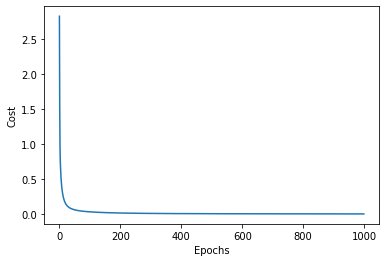

In [40]:
train_pred = sigmoid(np.dot(train_X, weights))
total_accuracy, class_2_accuracy, class_4_accuracy = accuracy(train_pred,train_Y)

print("Training Accuracy: ", total_accuracy)
print("Class 2 Training Accuracy: ", class_2_accuracy)
print("Class 4 Training Accuracy: ", class_4_accuracy) 
plt.plot(range(1000),cost);
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

### Testing

In [41]:
test_pred = sigmoid(np.dot(test_X, weights))
total_accuracy, class_2_accuracy, class_4_accuracy = accuracy(test_pred,test_Y)
print("Testing Accuracy: ", total_accuracy)
print("Class 2 Testing Accuracy: ", class_2_accuracy)
print("Class 4 Testing Accuracy: ", class_4_accuracy) 

Testing Accuracy:  100.0
Class 2 Testing Accuracy:  100.0
Class 4 Testing Accuracy:  100.0
